In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.style as mplstyle
%matplotlib inline
mplstyle.use('fivethirtyeight')

import datetime

In [2]:
from timeseries_regression_simulation import data_generator

# First we simulate the data

**Requirements:**

I need just three columns:

- Zip codes  
- Timestamps  
- Dollars

The zip codes need to be sampled from just a few, maybe 6 different zip codes. I'd like to have a random sample of time stamps. Maybe its possible. And finally a random sample of dollar amounts.

In [3]:
dat = data_generator()
dat.n = 1000

In [4]:
df = dat.get_sample()

In [5]:
df.head()

,Zip,Date,Amount
0,90028,2017-10-31,22.0
1,90027,2017-10-24,416.0
2,90024,2017-10-25,291.0
3,90024,2017-10-29,734.0
4,90027,2017-10-28,212.0


## Then we calculate how many days ago for each record

In [6]:
def days_ago(x):
    delta = datetime.date.today() - x
    return delta.days

In [7]:
df['DaysAgo'] = df['Date'].apply(days_ago)

df.head()

,Zip,Date,Amount,DaysAgo
0,90028,2017-10-31,22.0,17
1,90027,2017-10-24,416.0,24
2,90024,2017-10-25,291.0,23
3,90024,2017-10-29,734.0,19
4,90027,2017-10-28,212.0,20


## Then we look at data from a single zip code

In [8]:
z24 = df[df['Zip'] == 90024]

In [9]:
z24.head()

,Zip,Date,Amount,DaysAgo
2,90024,2017-10-25,291.0,23
3,90024,2017-10-29,734.0,19
9,90024,2017-11-04,211.0,13
13,90024,2017-11-12,692.0,5
21,90024,2017-11-08,192.0,9


## Then we run a regression on `days ago` and `amount`

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/home/emilio/anaconda3/envs/ml1/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Let's convert the pd.DataFrame into a numpy array that we can use for modeling. Actually since I have my trusty servant `Patsy` I can skip that step. It will do work on the pd.DataFrame.

In [11]:
#results = smf.ols('y ~ Amount + DaysAgo', data=z24).fit()

So that gave me an error.

    PatsyError: Error evaluating factor: NameError: name 'y' is not defined
        y ~ Amount + DaysAgo
        ^

I'm trying to do a regression with unlabeled data here. Not going to happen. So maybe I'll try something else. How about the average age of addresses within a zip code versus the ... no I don't have enough terms.

How about I just use one term.

In [12]:
results = smf.ols('Amount ~ DaysAgo', data=z24).fit()

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.300
Date:                Fri, 17 Nov 2017   Prob (F-statistic):              0.131
Time:                        23:08:35   Log-Likelihood:                -1289.0
No. Observations:                 184   AIC:                             2582.
Df Residuals:                     182   BIC:                             2588.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    491.1095     34.083     14.409      0.0

In [14]:
x_val = z24['DaysAgo'].values
x = sm.add_constant(z24['DaysAgo'].values)

y = z24['Amount'].values

n = len(x)

results = sm.OLS(y, x)

fitted = results.fit()

x_pred = np.linspace(x.min(), x.max(), n)

x_pred2 = sm.add_constant(x_pred)

y_pred = fitted.predict(x_pred2)

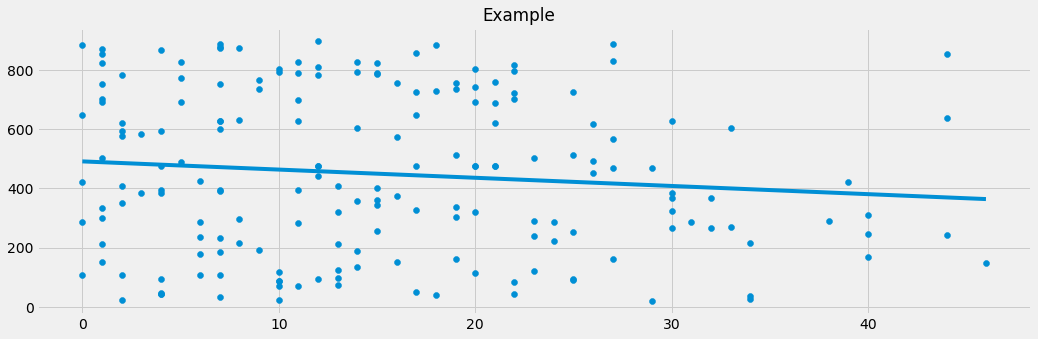

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(x_val, y)
fig.suptitle('Example')
fig.tight_layout(pad=2)
ax.grid(True)

ax.plot(x_pred, y_pred, '-')

## So what does this look like?

In [16]:
import seaborn as sns

sns.set(color_codes=True)

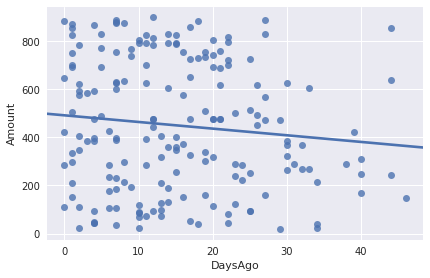

In [17]:
sns.regplot(x=z24['DaysAgo'], y=z24['Amount'], data=z24, ci=False)

That looks nice. But it's not the same regression as the summary from `statsmodels`. This one came from `seaborn`. I'll have to figure out how to plot the regression performed by `statsmodels`.

In [18]:
np.random.randn()

1.9946189924250066